# This Notebook visualises the Imagery created during the workshop

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

def visualise_imagery(image_path: str,
                      coefficient: int) -> None:

    # Load the raster image
    dataset = gdal.Open(image_path)

    def norm(band):
        band_min, band_max = band.min(), band.max()
        return ((band - band_min)/(band_max - band_min))

    b2 = norm(dataset.GetRasterBand(1).ReadAsArray().astype(float))
    b3 = norm(dataset.GetRasterBand(2).ReadAsArray().astype(float))
    b4 = norm(dataset.GetRasterBand(3).ReadAsArray().astype(float))

    # Get the image size
    cols = dataset.RasterXSize
    rows = dataset.RasterYSize

    # Get the geotransform (affine transformation) of the image
    geotransform = dataset.GetGeoTransform()

    # Calculate the image bounds
    min_x = geotransform[0]
    max_y = geotransform[3]
    max_x = min_x + geotransform[1] * cols
    min_y = max_y + geotransform[5] * rows
    
    b2 = b2 * coefficient
    b2_locs = np.where(b2==1.0)
    b2[b2_locs] = 1.0

    b3 = b3 * coefficient
    b3_locs = np.where(b3==1.0)
    b3[b3_locs] = 1.0

    b4 = b4 * coefficient
    b4_locs = np.where(b4==1.0)
    b4[b4_locs] = 1.0

    # Create RGB
    rgb = np.dstack((b4,b3,b2))

    # create the figure object
    fig = plt.figure(figsize=(6, 8)) 

    # Visualise RGB
    plt.imshow(rgb, extent=(min_x, max_x, min_y, max_y))
    
    return


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


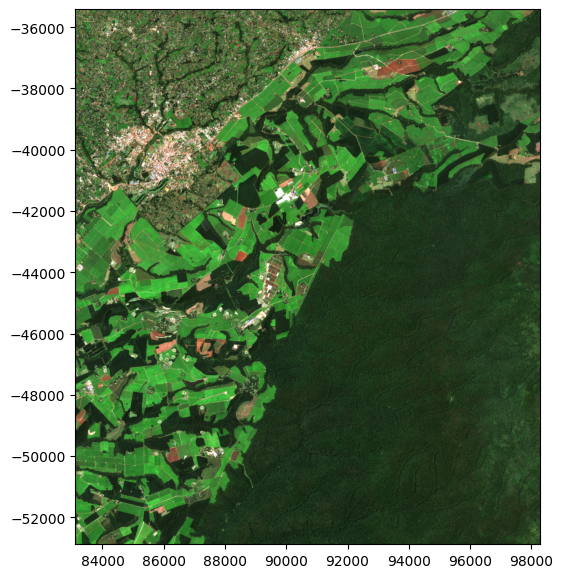

In [18]:
image_path = '/home/sepal-user/20230626_pyeo_installation/pyeo/models/my_model/composite_T36MYE_20230220T074941_clipped.tif'
coefficient = 5

visualise_imagery(image_path=image_path, coefficient=coefficient)


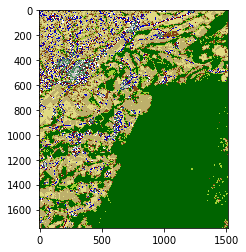

<BarContainer object of 6 artists>

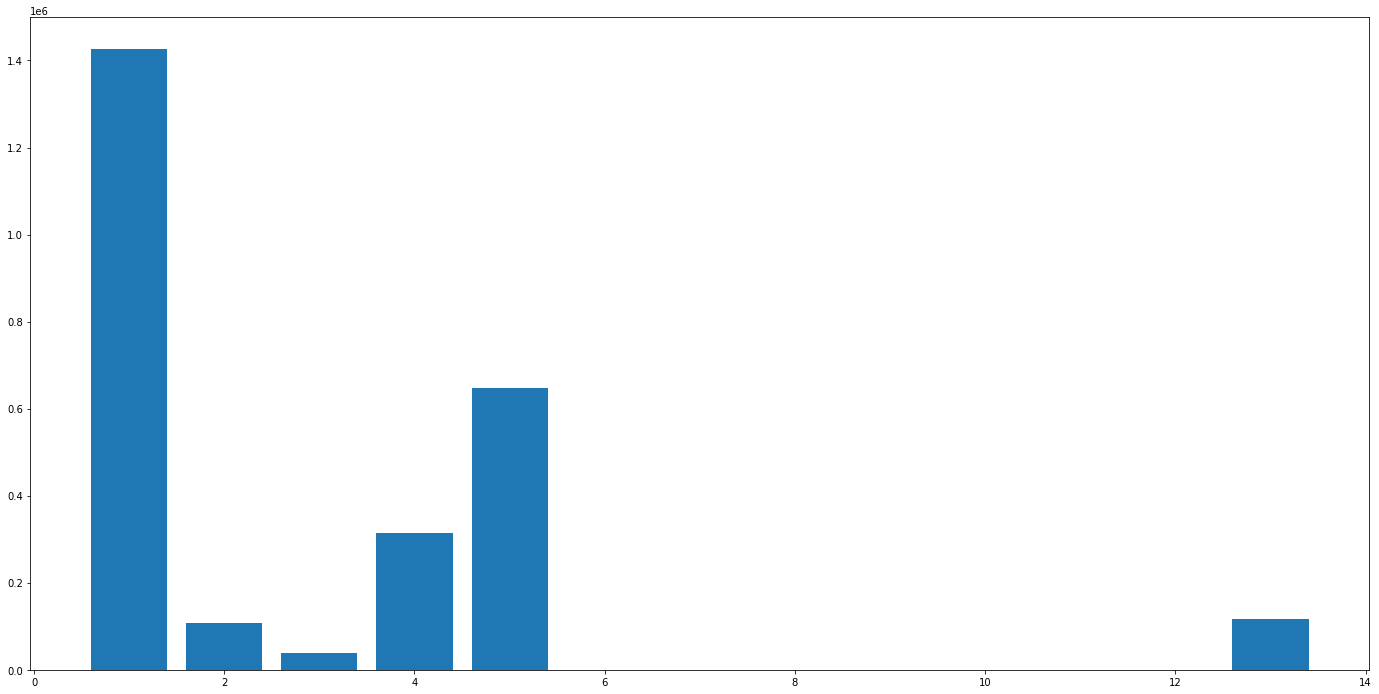

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show

# Load the raster image
src = rasterio.open('/home/sepal-user/20230626_pyeo_installation/pyeo/models/my_model/composite_T36MYE_20230220T074941_clipped_full_class.tif')

# Read the raster data
data = src.read(1)

# Define your custom colormap
colors = ['#006400', '#A0D032', '#844513', '#BDB06B', '#E0DA82', '#0000CD', '#800000',
          '#FFFFFF', '#3C3C3C', '#808080', '#2E8B57', '#5C915C', '#C8C8C8']

# Create a discrete colormap
cmap = matplotlib.colors.ListedColormap(colors)

# Set the number of classes
num_classes = 13

# Display the image using the custom colormap
show(data, cmap=cmap)

# Plot the distribution of classes
class_labels, class_counts = np.unique(data, return_counts=True)

plt.figure(figsize=(24, 12))
plt.bar(class_labels, class_counts)
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Class Distribution')
# plt.show(figsize=(12,6))